Extracting parameters from /home/robertofelipe_sg/Documents/EEG_Data/P30_RS.vhdr...
Setting channel info structure...
Reading 0 ... 367979  =      0.000 ...   367.979 secs...
Size of the Raw data
(63, 367980)
Size of the Resampled data
(63, 91995)
(91995,)
(45997,)
8.53850752758302
20.854394260557637


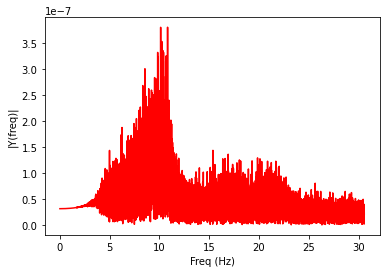

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import mne
import scipy as sp

from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange, signal

raw_path = '/home/robertofelipe_sg/Documents/EEG_Data/P30_RS.vhdr'

#Reading Data from 
a = mne.io.read_raw_brainvision(raw_path, preload=True)
b = a.get_data(start=0, stop=None)#, return_times=True)
print('Size of the Raw data')
print(b.shape)

#Resampling
sample_freq   = 1000
resample_freq = 250
t_recording = (len(b[1])/sample_freq) # time in secs
new_sampling = t_recording*resample_freq
data = sp.signal.resample(b,int(new_sampling), axis=1)
print('Size of the Resampled data')
print(data.shape)

#Filtering
nyq   = 0.5 * resample_freq
lowf  = 5
highf = 45
N     = 3
i, j = sp.signal.butter(N, [lowf/nyq, highf/nyq], 'bandpass')
filtered = sp.signal.filtfilt(i, j, data)

#Averaging all channels
signal = np.mean(filtered,0)
print(signal.shape)


def plotSpectrum(y,Fs):
# Plots a Single-Sided Amplitude Spectrum of y(t)

    n = len(y)                      # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T                       # two sides frequency range
    freq = frq[range(int(n/2))]     # one side frequency range

    Y = np.fft.fft(y)/n             # fft computing and normalization
    Y = Y[range(int(n/2))]
    print(Y.shape)
    #print(np.argmax(abs(Y)))

    if n > int(45*2*Fs):
        limite = int((45*Fs))
        #print(limite)
        alpha_idx = np.argmax(abs(Y[8*Fs:13*Fs]))
        print(freq[(8*Fs)+alpha_idx])
        gamma_idx = np.argmax(abs(Y[30*Fs:45*Fs]))
        print(freq[(30*Fs)+gamma_idx])  
    elif n < int(45*2*Fs):
        limite = int(45)
        #print(limite)
        alpha_idx = np.argmax(abs(Y[8:13]))
        print(freq[8+alpha_idx])
        gamma_idx = np.argmax(abs(Y[30:45]))
        print(freq[30+gamma_idx])
  
    plot(freq[0:limite],abs(Y)[0:limite],'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')
    show()
    
plotSpectrum(signal,resample_freq)
